In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [125]:
mypath = 'Fotos' #path with files to analyze
files = [f for f in listdir(mypath) if isfile(join(mypath, f))] #get all file names of that path

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

fotos = []
for file in files:
    img = mpimg.imread('Fotos/'+file) 
    gray = rgb2gray(img) 
    gray = gray.flatten()
    fotos.append(gray)
fotos = np.array(fotos)

In [126]:
#data = scale(fotos)
n_samples, n_features = data.shape
n_digits = 6 #la cantidad de clusters que voy a esperar, por las dudas para hacer PCA

In [127]:
pca = PCA(n_components=n_digits).fit(data) #PCA a 3 conjuntos posibles de histogramas 
kmeans_og = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
kmeans_og.fit(data)

KMeans(init=array([[-1.98645407e-16,  1.23033919e-18,  3.78391243e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.17332557e-16,  5.16099546e-17,  1.47353231e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.52789723e-15, -5.91298365e-18,  8.46276811e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.26808660e-15,  1.09870662e-16,  1.80298834e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.19309620e-15, -7.38073010e-16,  1.71868163e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.28615733e-16, -3.46423480e-16,  7.95815967e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
       n_clusters=6, n_init=1)

In [128]:
#visualize data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(n_clusters=6)

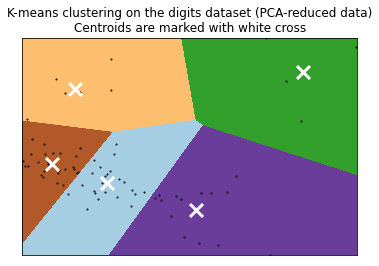

In [68]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [151]:
l = kmeans_og.labels_
a = [index for index, value in enumerate(l) if value == 5]
print(len(a))
for i in range(len(a)):
    print(a[i],files[a[i]])

18
1 RiesgoBahíaBlanca_Hist_2.png
4 RiesgoCABACABANA_Hist_2.png
15 RiesgoCórdobaColón_Hist_2.png
16 RiesgoCórdobaCórdoba_Hist_2.png
19 RiesgoCórdobaPunilla_Hist_2.png
23 RiesgoEntreRiosRíos_Hist_2.png
31 RiesgoLaMatanza_Hist_2.png
32 RiesgoLanúsNA_Hist_2.png
33 RiesgoLaPlata_Hist_2.png
38 RiesgoLomasde_Hist_2.png
40 RiesgoMendozaGuaymallen_Hist_2.png
43 RiesgoMendozaMendoza_Hist_2.png
48 RiesgoQuilmesNA_Hist_2.png
49 RiesgoRioNegroAdolfoAlsina_Hist_2.png
56 RiesgoSaltaSalta_Hist_2.png
60 RiesgoSantaCruzSantaCruz_Hist_2.png
67 RiesgoTierradelFuegoTierradel_Hist_2.png
70 RiesgoTucumanCruzAlta_Hist_2.png
